## API Set Up/Libraries

In [ ]:
pip install PyMovieDb

In [ ]:
pip install requests beautifulsoup4

In [ ]:
pip install gensim

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
from PyMovieDb import IMDB
imdb = IMDB()

In [ ]:
import pandas as pd
import requests
import json
import re

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from transformers import pipeline, AutoTokenizer

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

## Data Capture (IMDB)

In [ ]:
url = "https://www.theyshootpictures.com/gf1000_all1000films.htm"

In [ ]:
response1 = requests.get(url)

In [ ]:
soup = BeautifulSoup(response1.text, 'html')

In [ ]:
target_find = soup.find('div', class_ = 'stacks_in text_stack', id = 'stacks_in_1784').text.strip()
print(target_find)

Below is a straightforward listing of the 1,000 Greatest Films in ascending ranking order. The number in brackets is the position each film held in last year's edition (2023).1. (1)  CITIZEN KANE (Orson Welles, 1941, USA, 119m, BW)2. (2)  VERTIGO (Alfred Hitchcock, 1958, USA, 128m, Col)3. (3)  2001: A SPACE ODYSSEY (Stanley Kubrick, 1968, UK-USA, 139m, Col)4. (4)  TOKYO STORY (Yasujiro Ozu, 1953, Japan, 134m, BW)5. (5)  THE RULES OF THE GAME (Jean Renoir, 1939, France, 113m, BW)6. (6)  THE GODFATHER (Francis Ford Coppola, 1972, USA, 175m, Col)7. (7)  8½ (Federico Fellini, 1963, Italy, 135m, BW)8. (8)  SUNRISE (F.W. Murnau, 1927, USA, 110m, BW)9. (9)  THE SEARCHERS (John Ford, 1956, USA, 119m, Col)10. (10)  SEVEN SAMURAI (Akira Kurosawa, 1954, Japan, 200m, BW)11. (11)  SINGIN' IN THE RAIN (Stanley Donen & Gene Kelly, 1952, USA, 102m, Col)12. (12)  JEANNE DIELMAN, 23 QUAI DU COMMERCE, 1080 BRUXELLES (Chantal Akerman, 1975, Belgium-France, 201m, Col)13. (13)  APOCALYPSE NOW (Francis Ford 

In [ ]:
pattern = re.compile(r'\) ([A-Z\s]+) \(')

In [ ]:
matches = pattern.findall(target_find)

In [ ]:
movie_titles = []
for title in matches:
    movie_titles.append(title.strip())

print(movie_titles)

['CITIZEN KANE', 'VERTIGO', 'TOKYO STORY', 'THE RULES OF THE GAME', 'THE GODFATHER', 'SUNRISE', 'THE SEARCHERS', 'SEVEN SAMURAI', 'APOCALYPSE NOW', 'TAXI DRIVER', 'BICYCLE THIEVES', 'PERSONA', 'IN THE MOOD FOR LOVE', 'THE PASSION OF JOAN OF ARC', 'BREATHLESS', 'BATTLESHIP POTEMKIN', 'THE MAN WITH A MOVIE CAMERA', 'MIRROR', 'RASHOMON', 'CITY LIGHTS', 'ANDREI RUBLEV', 'PSYCHO', 'AU HASARD BALTHAZAR', 'THE GODFATHER PART II', 'SOME LIKE IT HOT', 'ORDET', 'LA DOLCE VITA', 'RAGING BULL', 'THE NIGHT OF THE HUNTER', 'CASABLANCA', 'REAR WINDOW', 'PLAYTIME', 'BLADE RUNNER', 'CONTEMPT', 'BARRY LYNDON', 'PATHER PANCHALI', 'TOUCH OF EVIL', 'STALKER', 'LAWRENCE OF ARABIA', 'THE GENERAL', 'BEAU TRAVAIL', 'MODERN TIMES', 'LATE SPRING', 'M', 'THE THIRD MAN', 'NORTH BY NORTHWEST', 'UGETSU MONOGATARI', 'THE BATTLE OF ALGIERS', 'THE APARTMENT', 'LA GRANDE ILLUSION', 'WILD STRAWBERRIES', 'FANNY AND ALEXANDER', 'GOODFELLAS', 'SHOAH', 'RIO BRAVO', 'PIERROT LE FOU', 'JOURNEY TO ITALY', 'ONCE UPON A TIME IN T

In [ ]:
columns = ['title', 'reviewBody', 'ratingValue', 'genre', 'datePublished', 'duration']
movies_df = pd.DataFrame(columns=columns)

In [ ]:
for title in movie_titles:
    # Fetch movie details by title
    res = imdb.get_by_name(title, tv=False)

    # Convert the response from JSON string to dictionary
    try:
        details = json.loads(res)
    except json.JSONDecodeError:
        print(f"Error decoding JSON for title: {title}")
        continue  # Skip this title and move to the next

    if details:  # Check if details is not empty
        # Extract the needed information
        movie_data = {
            'title': title,
            'reviewBody': details.get('review', {}).get('reviewBody', 'N/A'),
            'ratingValue': details.get('rating', {}).get('ratingValue', 'N/A'),
            'genre': ', '.join(details.get('genre', ['N/A'])),
            'datePublished': details.get('datePublished', 'N/A'),
            'duration': details.get('duration', 'N/A')
        }
        # Append the extracted data to the DataFrame
        movies_df = movies_df.append(movie_data, ignore_index=True)

# Display the DataFrame to verify
print(movies_df)

<ipython-input-72-715a11ff27d7>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movies_df = movies_df.append(movie_data, ignore_index=True)
<ipython-input-72-715a11ff27d7>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movies_df = movies_df.append(movie_data, ignore_index=True)
<ipython-input-72-715a11ff27d7>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movies_df = movies_df.append(movie_data, ignore_index=True)
<ipython-input-72-715a11ff27d7>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movies_df = movies_df.append(movie_data, ignore_index=True)
<ipython-input-72-715a11ff27d7>:23: FutureWarning: The frame.append method i

TypeError: can only join an iterable

In [ ]:
movies_df = pd.read_csv('movies.csv')

In [ ]:
movies_df.to_csv('movies.csv')

In [ ]:
df2 = pd.read_csv('movies.csv')

In [ ]:
df2

,Unnamed: 0,title,reviewBody,ratingValue,genre,datePublished,duration
0,0,CITIZEN KANE,"Citizen Kane is majestic, elegant and noble. I...",8.3,"Drama, Mystery",1941-09-05,PT1H59M
1,1,VERTIGO,"Scottie Ferguson is a police officer, retired ...",8.3,"Mystery, Romance, Thriller",1958-05-28,PT2H8M
2,2,TOKYO STORY,Tokyo monogatari (or Tokyo Story) is a very hu...,8.1,Drama,1972-03-13,PT2H16M
3,3,THE RULES OF THE GAME,NaN,NaN,"Comedy, Crime, Drama",NaN,NaN
4,4,THE GODFATHER,This must rank as the best film (along with pa...,9.2,"Crime, Drama",1972-03-24,PT2H55M
...,...,...,...,...,...,...,...
618,618,DAZED AND CONFUSED,NaN,7.6,Comedy,1993-09-24,PT1H43M
619,619,A STREETCAR NAMED DESIRE,NaN,7.9,Drama,1951-09-19,PT2H2M
620,620,THE WILD CHILD,NaN,NaN,NaN,NaN,NaN
621,621,THE NEW WORLD,"Undoubtedly not for everyone, Terrence Malick&...",6.7,"Biography, Drama, History",2006-01-20,PT2H15M


## Overall Analysis

In [ ]:
classifier = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
movies_df['reviewBody'] = movies_df['reviewBody'].astype(str)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

def truncate_text(text, max_length=512):
    # Ensure the input is a string
    if not isinstance(text, str):
        raise ValueError("Text input must be of type `str`.")
    # Tokenize and truncate the text
    tokens = tokenizer.encode(text, max_length=max_length, truncation=True, return_tensors="pt")
    # Decode tokens back to text, skipping special tokens
    truncated_text = tokenizer.decode(tokens[0], skip_special_tokens=True)
    return truncated_text

# Apply the function to truncate reviewBody texts
movies_df['reviewBody'] = movies_df['reviewBody'].apply(lambda x: truncate_text(x))

In [ ]:
def analyze_sentiment(text):
    result = classifier(text)[0]['label']
    return result

# Apply sentiment analysis to each review
movies_df['Sentiment'] = movies_df['reviewBody'].apply(analyze_sentiment)

IndexError: list index out of range

In [ ]:
movies_df

,Unnamed: 0,title,reviewBody,ratingValue,genre,datePublished,duration,Sentiment
0,0,CITIZEN KANE,"citizen kane is majestic, elegant and noble. i...",8.3,"Drama, Mystery",1941-09-05,PT1H59M,POSITIVE
1,1,VERTIGO,"scottie ferguson is a police officer, retired ...",8.3,"Mystery, Romance, Thriller",1958-05-28,PT2H8M,POSITIVE
2,2,TOKYO STORY,tokyo monogatari ( or tokyo story ) is a very ...,8.1,Drama,1972-03-13,PT2H16M,POSITIVE
3,3,THE RULES OF THE GAME,nan,NaN,"Comedy, Crime, Drama",NaN,NaN,POSITIVE
4,4,THE GODFATHER,this must rank as the best film ( along with p...,9.2,"Crime, Drama",1972-03-24,PT2H55M,POSITIVE
...,...,...,...,...,...,...,...,...
618,618,DAZED AND CONFUSED,nan,7.6,Comedy,1993-09-24,PT1H43M,POSITIVE
619,619,A STREETCAR NAMED DESIRE,nan,7.9,Drama,1951-09-19,PT2H2M,POSITIVE
620,620,THE WILD CHILD,nan,NaN,NaN,NaN,NaN,POSITIVE
621,621,THE NEW WORLD,"undoubtedly not for everyone, terrence malick ...",6.7,"Biography, Drama, History",2006-01-20,PT2H15M,POSITIVE


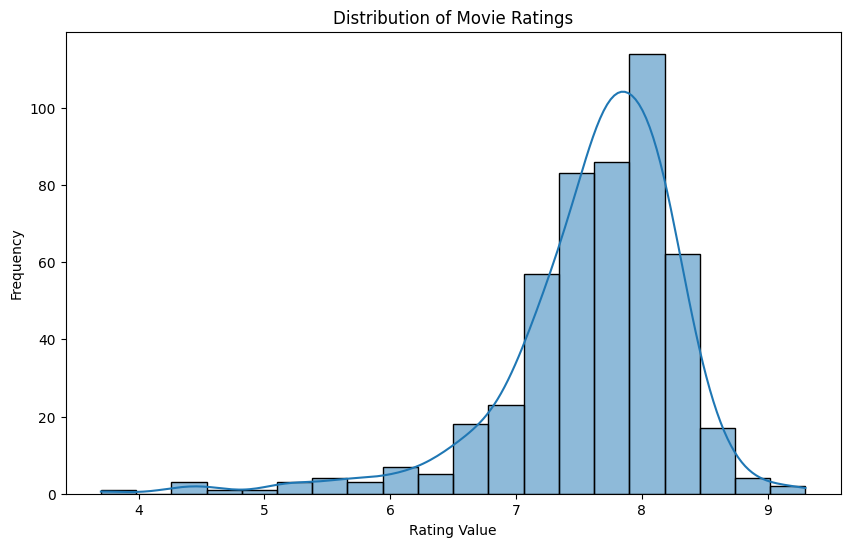

In [ ]:
movies_df['ratingValue'] = pd.to_numeric(movies_df['ratingValue'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='ratingValue', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.show()

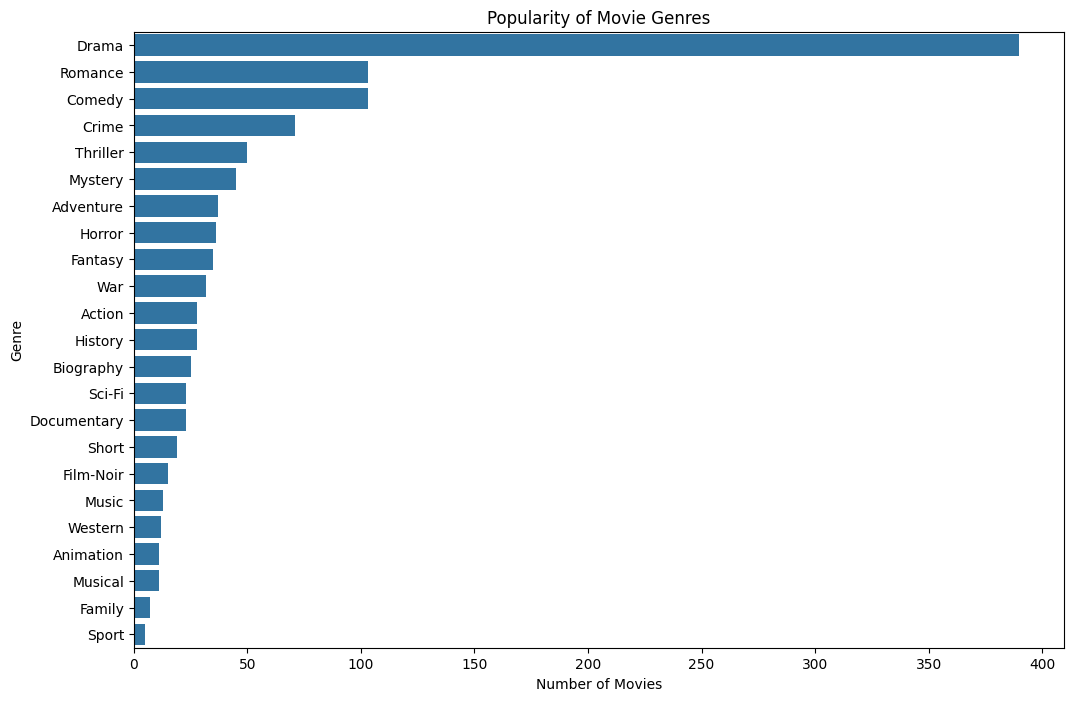

In [ ]:
all_genres = sum(movies_df['genre'].dropna().apply(lambda x: x.split(', ')).tolist(), [])

genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_df, x='Count', y='Genre')
plt.title('Popularity of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

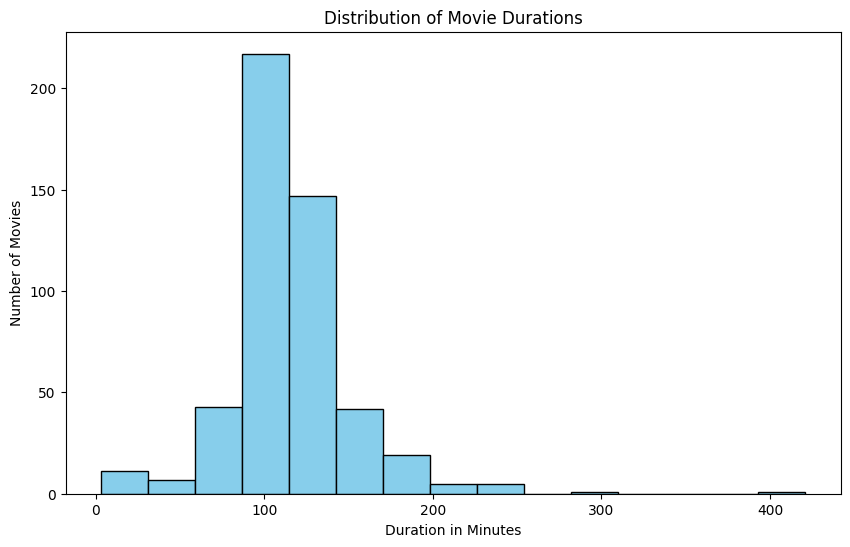

In [ ]:
def parse_duration(duration):
    if not isinstance(duration, str):
        return None  # or, e.g., 0 if you prefer to default to 0 minutes for missing/invalid entries

    # Extract hours and minutes using regex
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?')
    match = pattern.match(duration)
    if not match:
        return None  # or, e.g., 0 if you prefer to default to 0 minutes for missing/invalid entries

    hours, minutes = match.groups(default='0')
    return int(hours) * 60 + int(minutes)

# Apply the conversion function to the duration column
movies_df['duration_in_minutes'] = movies_df['duration'].apply(parse_duration)

plt.figure(figsize=(10, 6))
movies_df['duration_in_minutes'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Movies')
plt.grid(False)
plt.show()

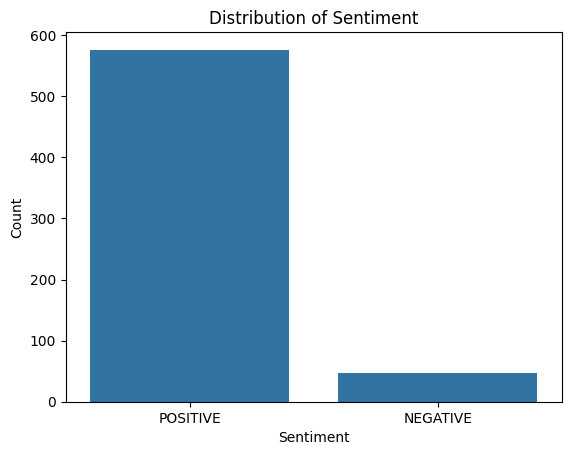

In [ ]:
sns.countplot(x='Sentiment', data=movies_df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-70-b054caeee5b2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_df, x='yearPublished', y='ratingValue', estimator='mean', ci=None)


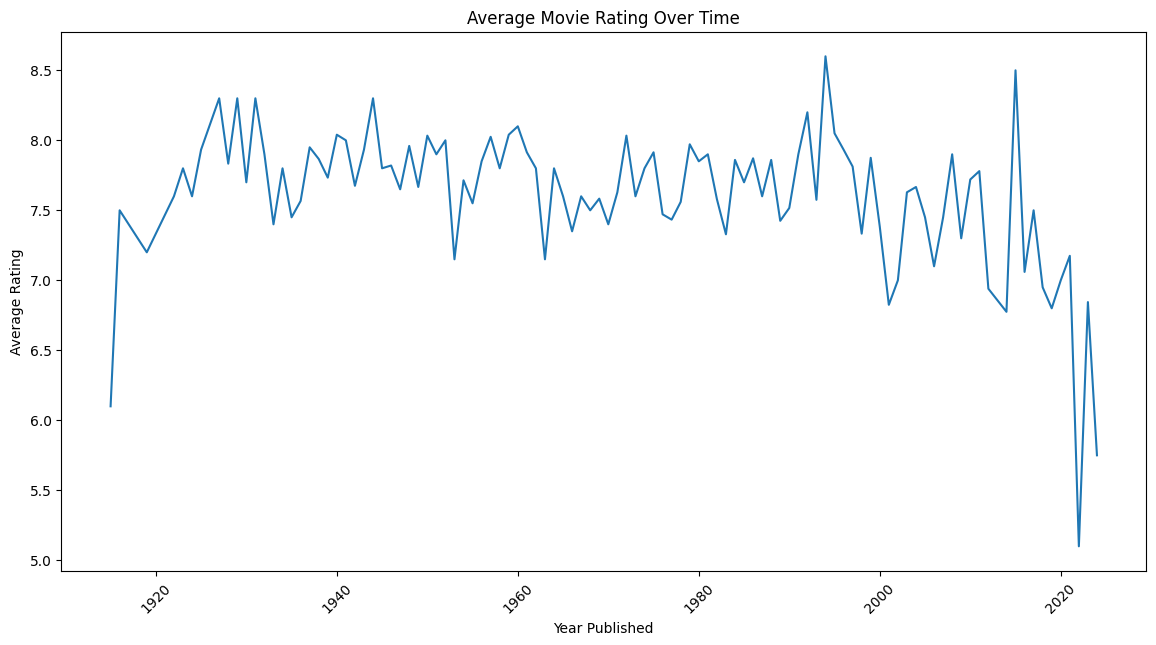

In [ ]:
movies_df['yearPublished'] = pd.to_datetime(movies_df['datePublished'], errors='coerce').dt.year

plt.figure(figsize=(14, 7))
sns.lineplot(data=movies_df, x='yearPublished', y='ratingValue', estimator='mean', ci=None)
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year Published')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

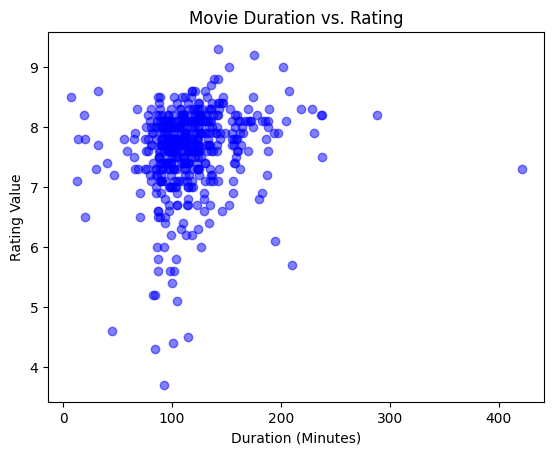

In [ ]:
plt.scatter(movies_df['duration_in_minutes'], movies_df['ratingValue'], alpha=0.5, color='blue')
plt.title('Movie Duration vs. Rating')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Rating Value')
plt.show()

# Sentiment Analysis

<ipython-input-72-c53192fae54f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=movies_df, palette='viridis')


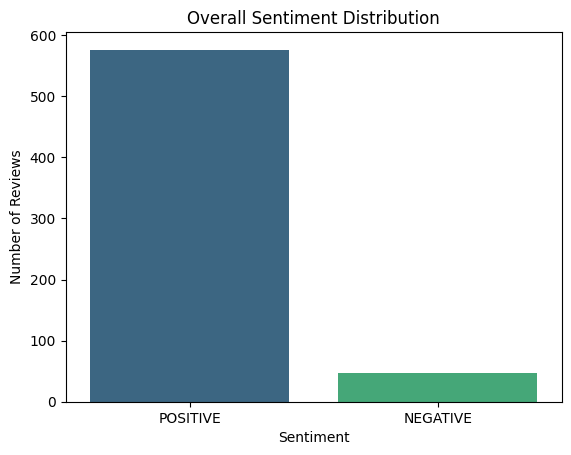

In [ ]:
sns.countplot(x='Sentiment', data=movies_df, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

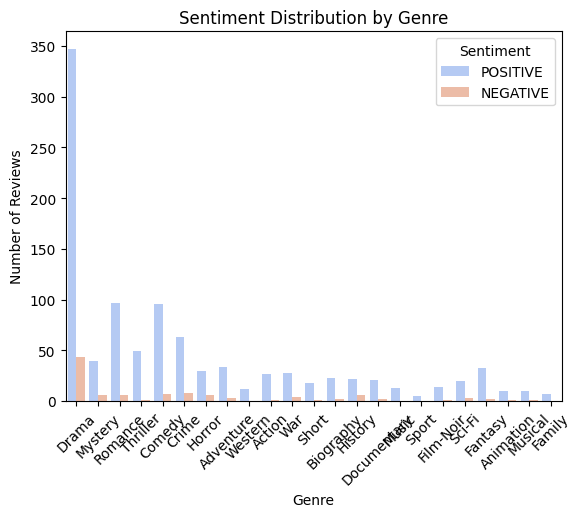

In [ ]:
movies_df_exploded = movies_df.dropna(subset=['genre']).assign(genre=movies_df['genre'].str.split(', ')).explode('genre')

sns.countplot(x='genre', hue='Sentiment', data=movies_df_exploded, palette='coolwarm')
plt.title('Sentiment Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


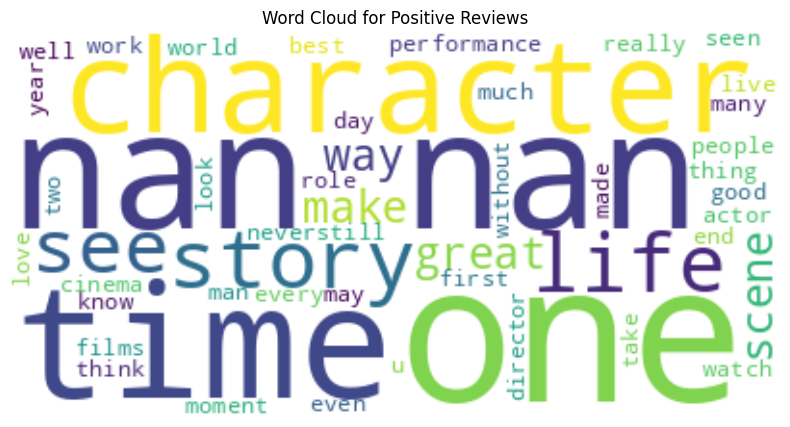

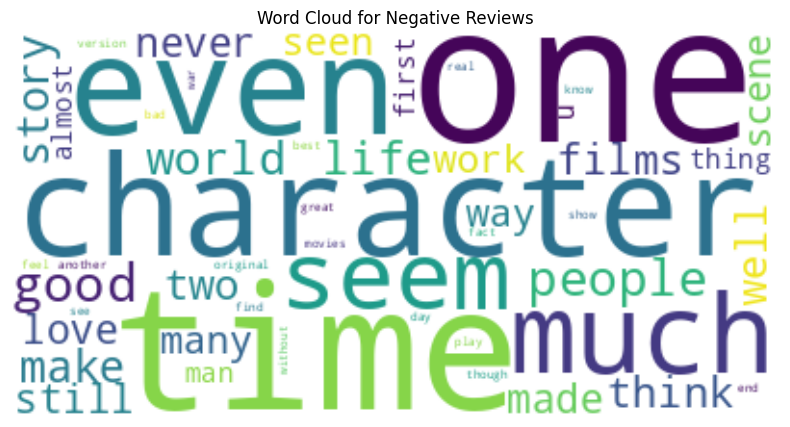

In [ ]:
nltk.download('stopwords')

# Combine NLTK stopwords with WordCloud's stopwords
stopwords_set = set(stopwords.words('english')).union(STOPWORDS)

# Add custom stopwords
custom_stopwords = ['apos', 'movie', 'film']  # Add any other words you want to exclude
stopwords_set.update(custom_stopwords)

# Function to generate and display a word cloud
def generate_word_cloud(text_data, title):
    wordcloud = WordCloud(stopwords=stopwords_set, max_font_size=100, max_words=50, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Concatenate all reviews for positive and negative sentiments
positive_reviews = ' '.join(movies_df[movies_df['Sentiment'] == 'POSITIVE']['reviewBody'].dropna())
negative_reviews = ' '.join(movies_df[movies_df['Sentiment'] == 'NEGATIVE']['reviewBody'].dropna())

# Generate word clouds
generate_word_cloud(positive_reviews, 'Word Cloud for Positive Reviews')
generate_word_cloud(negative_reviews, 'Word Cloud for Negative Reviews')

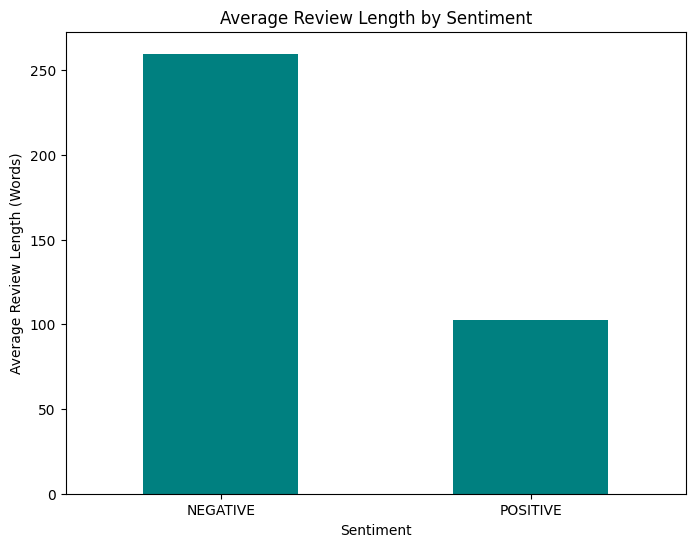

In [ ]:
movies_df['review_length'] = movies_df['reviewBody'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Average review length by sentiment
avg_review_length_by_sentiment = movies_df.groupby('Sentiment')['review_length'].mean()

# Visualize the results
avg_review_length_by_sentiment.plot(kind='bar', color='teal', figsize=(8, 6))
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length (Words)')
plt.xticks(rotation=0)
plt.show()